<a href="https://colab.research.google.com/github/SanthoshiRavi/Spin-Glass-Community-Detection-Algorithm/blob/main/Spin_Glass_Community_Detection_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
python3-cairo is already the newest version (1.20.1-3build1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


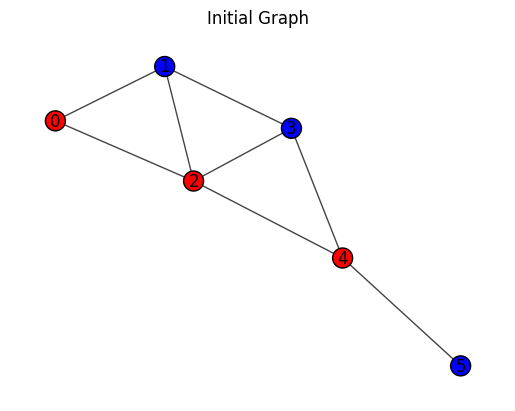

Iteration 1, Node 3 flipped, Delta H = -2.0000


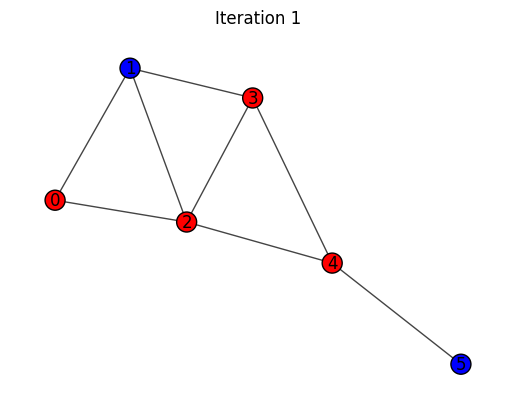

Iteration 2, Node 4 flipped, Delta H = 2.0000


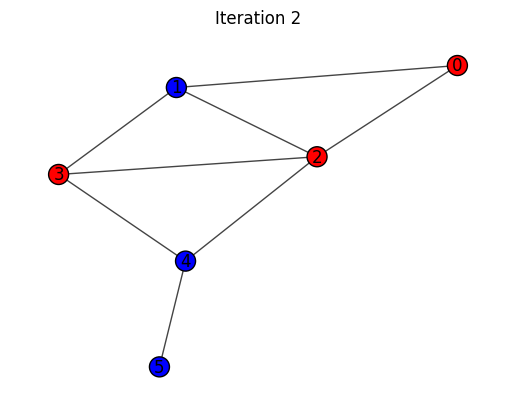

Iteration 3, Node 4 flipped, Delta H = -2.0000


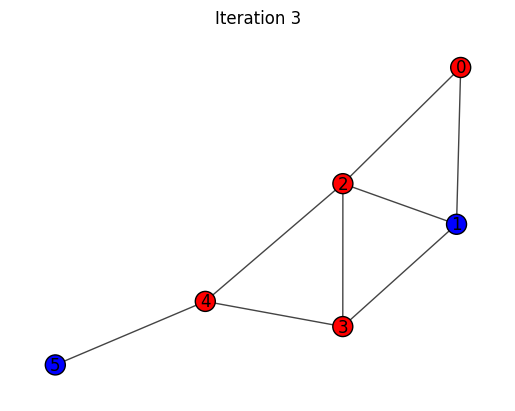

Iteration 4, Node 4 flipped, Delta H = 2.0000


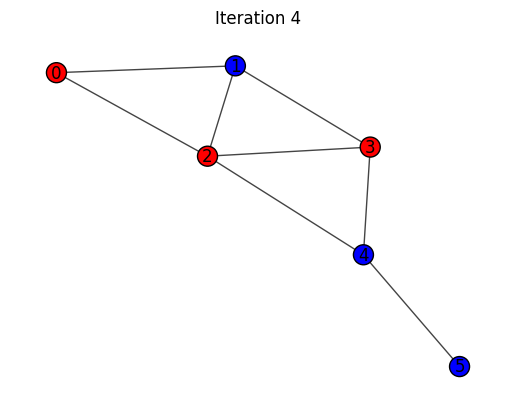

Iteration 5, Node 2 flipped, Delta H = 0.0000


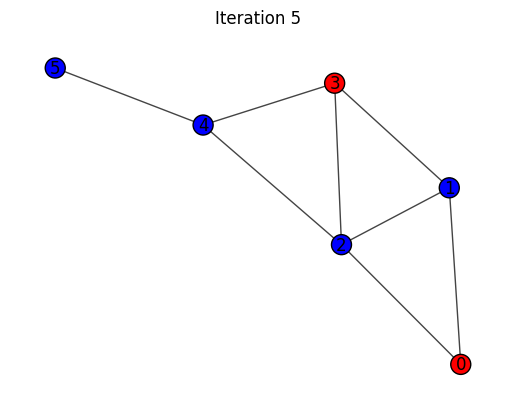

Convergence reached.
Final Spins: [ 1 -1 -1  1 -1 -1]
Final Energy: 2


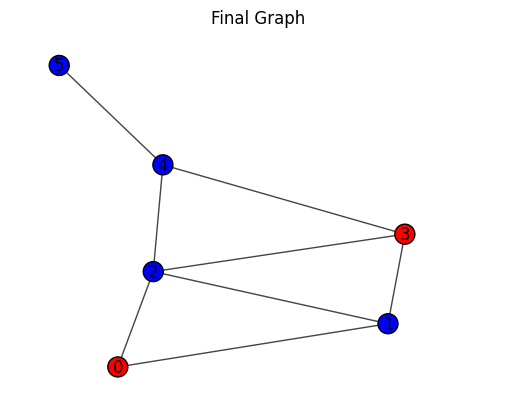

In [8]:
# Install necessary libraries
!pip install python-igraph
!apt-get install -y python3-cairo

# Import necessary libraries
import igraph as ig
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

# Set random seed for reproducibility
np.random.seed(42)

def plot_graph(graph, spins, title):
    # Assign colors based on spins
    colors = ['red' if spin == 1 else 'blue' for spin in spins]
    layout = graph.layout("fr")

    visual_style = {
        "vertex_color": colors,
        "vertex_size": 20,
        "vertex_label": range(len(spins)),
        "edge_width": 1,
        "layout": layout,
        "bbox": (300, 300),
        "margin": 20
    }

    fig, ax = plt.subplots()
    ig.plot(graph, **visual_style, target=ax)
    plt.title(title)
    plt.show()

def calculate_hamiltonian(graph, spins):
    hamiltonian = 0
    for edge in graph.es:
        i, j = edge.tuple
        hamiltonian -= spins[i] * spins[j]
    return hamiltonian

def spin_glass_algorithm(graph, initial_spin, max_iterations=1000, energy_threshold=1e-4, temp=2.0):
    spins = np.array(initial_spin)
    n = len(spins)
    current_energy = calculate_hamiltonian(graph, spins)

    for iteration in range(max_iterations):
        node = np.random.randint(n)
        new_spins = spins.copy()
        new_spins[node] *= -1

        new_energy = calculate_hamiltonian(graph, new_spins)
        delta_h = new_energy - current_energy

        if delta_h <= 0 or np.random.rand() < np.exp(-delta_h / temp):
            spins = new_spins
            current_energy = new_energy

        # Print and plot the graph at each iteration
        print(f"Iteration {iteration + 1}, Node {node} flipped, Delta H = {delta_h:.4f}")
        plot_graph(graph, spins, f"Iteration {iteration + 1}")

        # Check convergence
        if abs(delta_h) < energy_threshold:
            print("Convergence reached.")
            break

    return spins, current_energy

# Create a more complex example graph with 6 nodes
edges = [(0, 1), (0, 2), (1, 2), (1, 3), (2, 3), (2, 4), (3, 4), (4, 5)]
g = ig.Graph(edges=edges)

# Initial spin configuration
initial_spin = [+1, -1, +1, -1, +1, -1]

# Plot initial graph
plot_graph(g, initial_spin, "Initial Graph")

# Run the algorithm
final_spins, final_energy = spin_glass_algorithm(g, initial_spin)

print("Final Spins:", final_spins)
print("Final Energy:", final_energy)

# Plot final graph
plot_graph(g, final_spins, "Final Graph")
